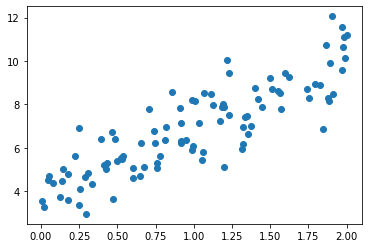

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[3.89063744]
[[3.01418594]]


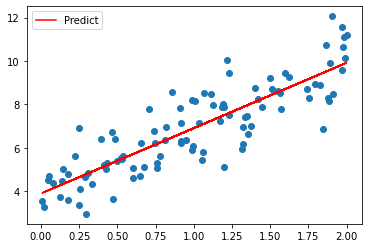

In [3]:
y_pred = lin_reg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, "r", label="Predict")
plt.legend()
plt.show()

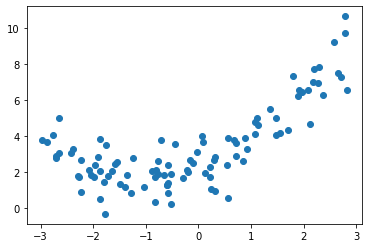

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0]) # X[0], X[0]^2

[1.90923231]
[1.90923231 3.64516803]


In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.23348255]), array([[0.99889117, 0.49485267]]))

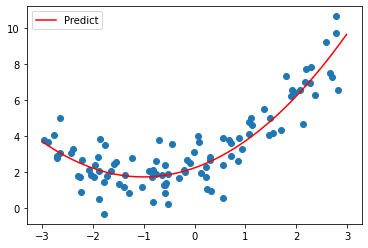

In [7]:
y_pred = lin_reg.predict(X_poly)
X_new = np.arange(start=-3, stop=3, step=0.01)
X_new = X_new.reshape(len(X_new), -1)
X_new_poly = poly_features.fit_transform(X_new)
y_new_pred = lin_reg.predict(X_new_poly)
plt.scatter(X, y)
plt.plot(X_new, y_new_pred, 'r-', label='Predict')
plt.legend()
plt.show()

In [8]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

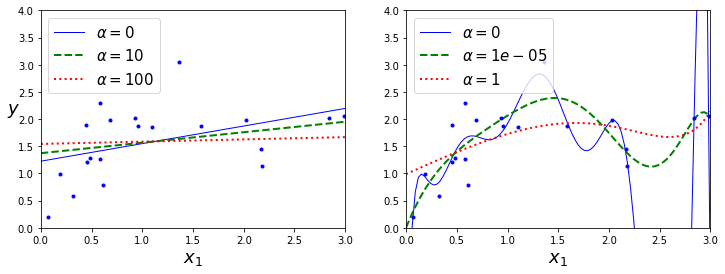

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(12,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor

iris = load_iris()
X = iris.data[:, 1:2]
y = iris.target

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

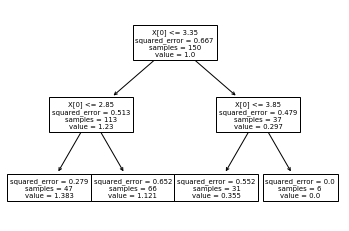

In [11]:
from sklearn import tree
tree.plot_tree(tree_reg)
plt.show()

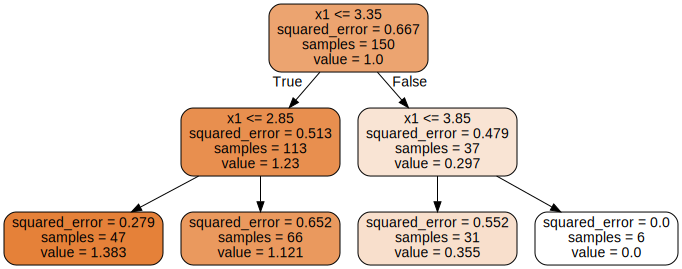

In [12]:
import graphviz
dot_data = tree.export_graphviz(
    tree_reg,
    out_file=None, 
    feature_names=["x1"],
    rounded=True,
    filled=True
)

graph = graphviz.Source(dot_data, format="png") 
graph

# export_graphviz(
#         tree_reg1,
#         out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
#         feature_names=["x1"],
#         rounded=True,
#         filled=True
#     )

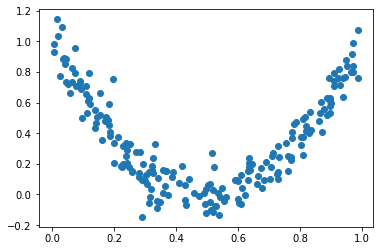

In [13]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
plt.scatter(X, y)
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

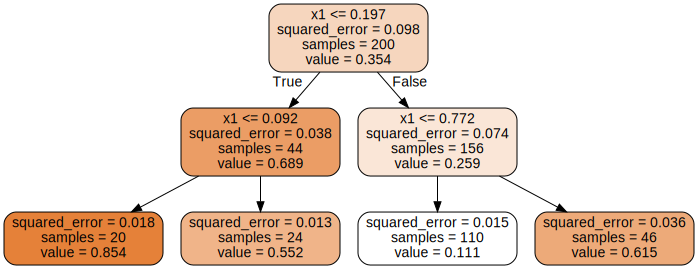

In [15]:
from sklearn.tree import export_graphviz
from graphviz import Source

dot_data = export_graphviz(
    tree_reg,
    feature_names=['x1'],
    rounded=True,
    filled=True
)
graph = Source(dot_data, 'png')
graph

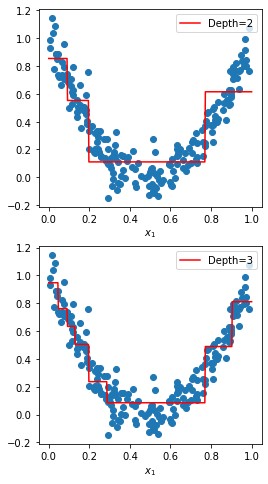

In [16]:
X_new = np.linspace(0, 1, 400).reshape(400, 1)
y_new = tree_reg.predict(X_new)
y_new2 = tree_reg2.predict(X_new)
plt.figure(figsize=(4, 8))

plt.subplot(211)
plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-', label='Depth=2')
plt.xlabel('$x_1$')
plt.legend(loc='upper right')

plt.subplot(212)
plt.scatter(X, y)
plt.plot(X_new, y_new2, 'r-', label='Depth=3')
plt.xlabel('$x_1$')
plt.legend(loc='upper right')

plt.show()

In [17]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


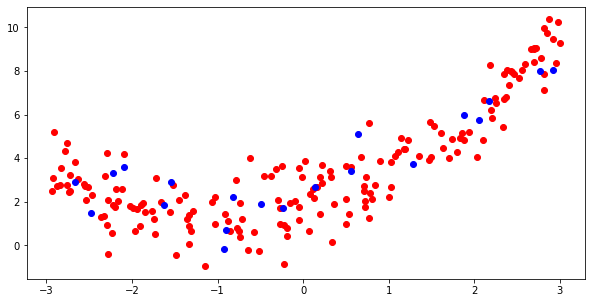

In [18]:
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()

In [19]:
lin_reg = LinearRegression()
rid_reg = Ridge(alpha=0)
las_reg = Lasso(alpha=0.01)
rnd_reg = RandomForestRegressor()

lin_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", lin_reg)
])

rid_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", rid_reg)
])

las_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", las_reg)
])

voting_reg = VotingRegressor(
    estimators=[('lr', lin_reg), ('rid', rid_reg), ('las', las_reg), ('rf', rnd_reg)]
)

In [20]:
reg_name = ['Linear', 'Ridge', 'Lasso', 'RandomForest', 'Voting']
for idx, reg in enumerate([lin_reg, rid_reg, las_reg, rnd_reg, voting_reg]):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg_name[idx], r2_score(y_test, y_pred))


Linear 0.8030002318106082
Ridge 0.8030002318106082
Lasso 0.8052369660703799
RandomForest 0.8111403052483155
Voting 0.8261973775085754


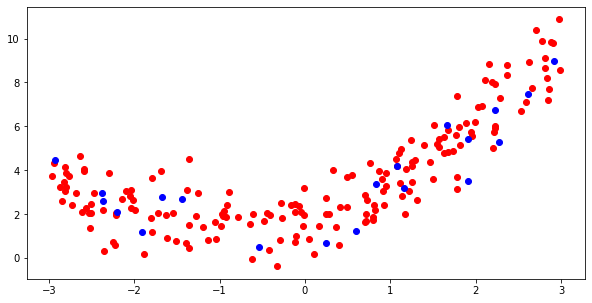

In [21]:
from sklearn.model_selection import train_test_split

m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()

In [22]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import AdaBoostRegressor

bag_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)
ada_reg = AdaBoostRegressor()
bag_reg.fit(X_train, y_train)
ada_reg.fit(X_train, y_train)
y_pred=bag_reg.predict(X_test)
ada_y_pred = ada_reg.predict(X_test)
print("r2 score:", r2_score(y_test, y_pred))
print("mean squared error:", mean_squared_error(y_test, y_pred))
print("mean absolute error:", mean_absolute_error(y_test, y_pred))

print("r2 score:", r2_score(y_test, ada_y_pred))
print("mean squared error:", mean_squared_error(y_test, ada_y_pred))
print("mean absolute error:", mean_absolute_error(y_test, ada_y_pred))

r2 score: 0.7984486343540977
mean squared error: 1.0231892000787122
mean absolute error: 0.8227343710711773
r2 score: 0.7862736452914965
mean squared error: 1.0849963591619993
mean absolute error: 0.8684467816549576


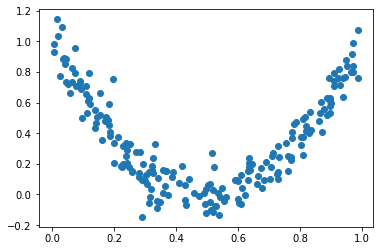

In [23]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
plt.scatter(X, y)
plt.show()

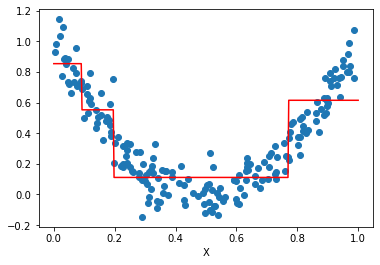

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

rnd_reg = RandomForestRegressor(n_estimators=500, 
                    max_leaf_nodes=16, n_jobs=-1)
y = y.ravel()
rnd_reg.fit(X, y)
y_pred = rnd_reg.predict(X)

X_new = np.linspace(0, 1, 400).reshape(400, 1)
y_new = tree_reg.predict(X_new)
plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-')
plt.xlabel('X')
plt.show()


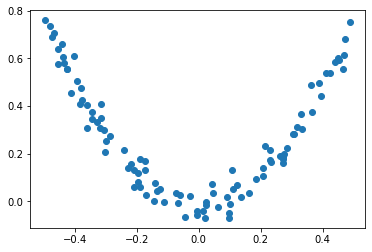

In [25]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)
plt.scatter(X, y)
plt.show()

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [27]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

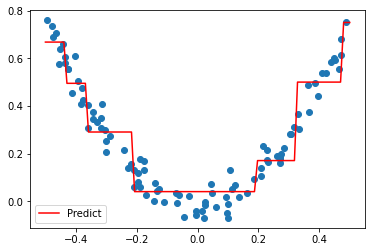

In [28]:
X_new = np.linspace(-0.5, 0.5, 100).reshape(100, 1)
y_new = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-', label='Predict')
plt.legend()
plt.show()

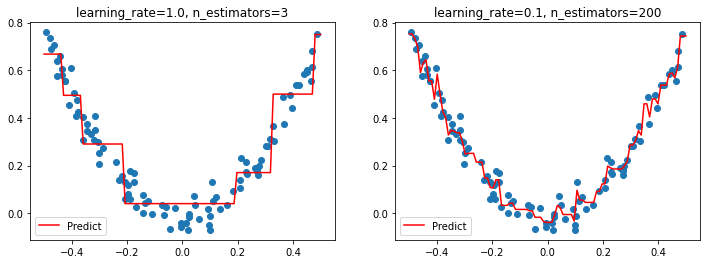

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)
gbrt2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1)
gbrt2.fit(X, y)

plt.figure(figsize=(12,4))
y_new = gbrt.predict(X_new)
plt.subplot(1,2,1)
plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-', label='Predict')
plt.legend()
plt.title('learning_rate=1.0, n_estimators=3')
y_new2 = gbrt2.predict(X_new)
plt.subplot(1,2,2)
plt.scatter(X, y)
plt.plot(X_new, y_new2, 'r-', label='Predict')
plt.legend()
plt.title('learning_rate=0.1, n_estimators=200')
plt.show()

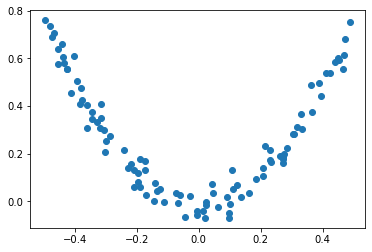

In [30]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)
plt.scatter(X, y)
plt.show()

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

min_error = np.min(errors)
print(min_error)

0.002631034539199153


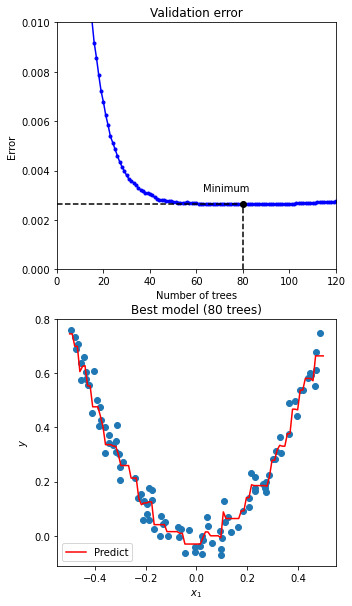

In [32]:
plt.figure(figsize=(5, 10))

X_new = np.linspace(-0.5, 0.5, 100).reshape(100, 1)
y_new = gbrt_best.predict(X_new)

plt.subplot(2,1,1)
plt.plot(np.arange(start=1, stop=len(errors)+1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, bst_n_estimators], [min_error, min_error], "k--" )
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators-7, min_error*1.2, "Minimum", ha="center")
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error")
plt.title("Validation error")

plt.subplot(2,1,2)
plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-', label='Predict')
plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("Best model (%d trees)" % bst_n_estimators)

plt.show()

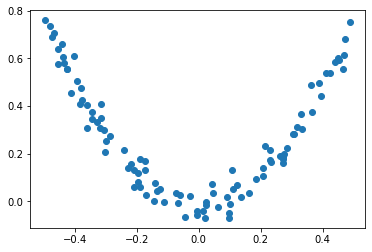

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)
plt.scatter(X, y)
plt.show()

In [34]:
# X_train, X_val, y_train, y_val = train_test_split(X, y)

In [35]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

print(gbrt.n_estimators) 
print('Validation MSE:', min_val_error)

59
Validation MSE: 0.0026930464329994377


In [36]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print('Validation MSE:', val_error)

Validation MSE: 0.0032701197793426123


In [37]:
# 조기종료
xgb_reg.set_params(early_stopping_rounds=2, eval_metric=['rmse'])
xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train)])
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print('Validation MSE:', val_error)

[0]	validation_0-rmse:0.24889
[1]	validation_0-rmse:0.18112
[2]	validation_0-rmse:0.13317
[3]	validation_0-rmse:0.09882
[4]	validation_0-rmse:0.07423
[5]	validation_0-rmse:0.05688
[6]	validation_0-rmse:0.04496
[7]	validation_0-rmse:0.03685
[8]	validation_0-rmse:0.03088
[9]	validation_0-rmse:0.02693
[10]	validation_0-rmse:0.02314
[11]	validation_0-rmse:0.02056
[12]	validation_0-rmse:0.01912
[13]	validation_0-rmse:0.01768
[14]	validation_0-rmse:0.01657
[15]	validation_0-rmse:0.01536
[16]	validation_0-rmse:0.01444
[17]	validation_0-rmse:0.01399
[18]	validation_0-rmse:0.01341
[19]	validation_0-rmse:0.01267
[20]	validation_0-rmse:0.01184
[21]	validation_0-rmse:0.01135
[22]	validation_0-rmse:0.01080
[23]	validation_0-rmse:0.01029
[24]	validation_0-rmse:0.01005
[25]	validation_0-rmse:0.00967
[26]	validation_0-rmse:0.00906
[27]	validation_0-rmse:0.00873
[28]	validation_0-rmse:0.00856
[29]	validation_0-rmse:0.00817
[30]	validation_0-rmse:0.00774
[31]	validation_0-rmse:0.00742
[32]	validation_0-

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [39]:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

In [40]:
print(mean_absolute_error(y_true, y_pred))
sk_MAE = mean_absolute_error(y_true, y_pred)
MAE = np.mean(np.abs(y_true - y_pred))
print(sk_MAE)
print(MAE)

0.5
0.5
0.5


In [41]:
print(mean_squared_error(y_true, y_pred))
sk_MSE = mean_squared_error(y_true, y_pred)
MSE = np.mean((y_true - y_pred) ** 2, axis=0)
print(sk_MSE)
print(MSE)

0.375
0.375
0.375


In [42]:
print(r2_score(y_true, y_pred))
sk_R2 = r2_score(y_true, y_pred)
R2_Score = 1 - np.mean((y_true - y_pred)**2, axis=0) / np.var(y_true)
print(R2_Score)

0.9486081370449679
0.9486081370449679
